<h1><b>[VII - Construction]</b></h1>

We can finally construct our final dataset!

The dataset will be save in `data/train_df_FINAL.csv` and `data/test_df_FINAL.csv`

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("data/train_df.csv")
test_df = pd.read_csv("data/test_df.csv")

In [10]:
NB_TRAINS = len(train_df)

_____________________
Features 2

In [8]:
neighb_density = np.load("data/neighb_density.npy")
neighb_nb = np.load("data/neighb_nb.npy")
neighb_similar = np.load("data/neighb_similar.npy")

In [12]:
train_df["neighb_density"] = neighb_density[:NB_TRAINS]
train_df["neighb_nb"] = neighb_nb[:NB_TRAINS]
train_df["neighb_similar"] = neighb_similar[:NB_TRAINS]

test_df["neighb_density"] = neighb_density[NB_TRAINS:]
test_df["neighb_nb"] = neighb_nb[NB_TRAINS:]
test_df["neighb_similar"] = neighb_similar[NB_TRAINS:]

_________________________
Features 3

In [13]:
diffs_change_status1 = np.load("data/diffs_change_status0.001.npy")
diffs_change_status3 = np.load("data/diffs_change_status0.003.npy")

In [15]:
for iDate in range(5):
    train_df[f"neighb_maxdiff_change_status_date{iDate}_0.001"] = diffs_change_status1[iDate][:NB_TRAINS]
    test_df[f"neighb_maxdiff_change_status_date{iDate}_0.001"] = diffs_change_status1[iDate][NB_TRAINS:]

for iDate in range(5):
    train_df[f"neighb_maxdiff_change_status_date{iDate}_0.003"] = diffs_change_status3[iDate][:NB_TRAINS]
    test_df[f"neighb_maxdiff_change_status_date{iDate}_0.003"] = diffs_change_status3[iDate][NB_TRAINS:]

________________
Features 4

In [16]:
for method in ["mean", "std"]:
    for iDate in range(5):
        csv = pd.read_csv(f"data/neighb_maxdiff_{method}color_{iDate}.csv")
        train_df[f"neighb_maxdiff_{method}color_{iDate}"] = csv[f"neighb_maxdiff_{method}color_{iDate}"].to_numpy()[:NB_TRAINS]
        test_df[f"neighb_maxdiff_{method}color_{iDate}"] = csv[f"neighb_maxdiff_{method}color_{iDate}"].to_numpy()[NB_TRAINS:]

___________________
Features 5

In [17]:
for iDate in range(5):
    csv = pd.read_csv(f"data/neighb_meandiff_changestatus_{iDate}.csv")
    train_df[f"neighb_meandiff_changestatus_{iDate}"] = csv[f"neighb_meandiff_changestatus_{iDate}"].to_numpy()[:NB_TRAINS]
    test_df[f"neighb_meandiff_changestatus_{iDate}"] = csv[f"neighb_meandiff_changestatus_{iDate}"].to_numpy()[NB_TRAINS:]

_______________________
Features 6

In [18]:
for method in ["mean", "std"]:
    for iDate in range(5):
        csv = pd.read_csv(f"data/neighb_meandiff_{method}color_{iDate}.csv")
        train_df[f"neighb_meandiff_{method}color_{iDate}"] = csv[f"neighb_meandiff_{method}color_{iDate}"].to_numpy()[:NB_TRAINS]
        test_df[f"neighb_meandiff_{method}color_{iDate}"] = csv[f"neighb_meandiff_{method}color_{iDate}"].to_numpy()[NB_TRAINS:]

____________________________

In [19]:
train_df.head()

,urban_type,geography_type,change_type,index,geometry,"urban_type_N,A",urban_type_UrbanSlum,urban_type_Rural,urban_type_DenseUrban,urban_type_Industrial,...,neighb_meandiff_meancolor_0,neighb_meandiff_meancolor_1,neighb_meandiff_meancolor_2,neighb_meandiff_meancolor_3,neighb_meandiff_meancolor_4,neighb_meandiff_stdcolor_0,neighb_meandiff_stdcolor_1,neighb_meandiff_stdcolor_2,neighb_meandiff_stdcolor_3,neighb_meandiff_stdcolor_4
0,Sparse Urban,"Dense Forest,Grass Land",1,0,"POLYGON ((112.16774086470313 32.0219772550438,...",0.0,0,0,0,0,...,41.218072,53.415744,0.830730,-38.613157,0.862482,-0.222173,28.776537,1.171524,-22.193249,3.225752
1,Sparse Urban,"Dense Forest,Grass Land",1,1,POLYGON ((112.16848748857684 32.02047741874698...,0.0,0,0,0,0,...,62.641541,153.365827,13.932604,-30.509336,50.069651,-17.088303,-1.663827,3.654883,-44.086075,-3.225888
2,Sparse Urban,"Dense Forest,Grass Land",1,2,POLYGON ((112.16891598575654 32.01968680736571...,0.0,0,0,0,0,...,21.751123,64.394203,-12.089585,-17.190314,7.150059,-7.524125,35.144122,6.819188,-52.969705,13.382244
3,Rural,"Dense Forest,Grass Land",1,3,POLYGON ((112.16966260963025 32.01809977128419...,0.0,0,1,0,0,...,27.539912,61.336169,-56.298177,-54.223249,-2.200072,10.556988,32.857172,-0.754455,-31.125627,18.403588
4,Dense Urban,"Sparse Forest,Dense Forest,Farms",0,4,POLYGON ((112.16668909889843 32.01597209653754...,0.0,0,0,1,0,...,155.646857,142.110806,93.716103,220.215236,42.091290,24.233205,17.400085,14.967066,61.859579,5.183346


<AxesSubplot:xlabel='change_type', ylabel='neighb_meandiff_changestatus_4'>

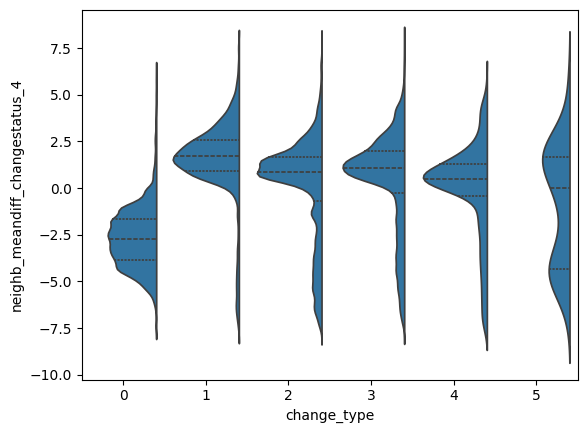

In [43]:
import seaborn as sns

sns.violinplot(x="change_type", y="neighb_meandiff_changestatus_4", hue=None, data=train_df, split=True, inner="quart")

In [44]:
train_df.to_csv("data/train_df_FINAL.csv", index=False)
test_df.to_csv("data/test_df_FINAL.csv", index=False)